# Monopoly Topic Modeling: Word Clouds

Author: Heidi Smith

In our period of focus, the Restoration Period of Europe, *monopolies* become an important concept. But what is discussed when the term "monopoly" is used? To begin to figure this out, we will create word clouds for the common terms/words that appear in texts wherein "monopoly" or one of its other spellings are found to serve as a basis for finding other relvant research directions. Using pandas and the Python wordcloud package, the below code was created.

*Code adapted from work by the 2021 Data+ Team: Rubenstein Library's Card Catalogue*: https://github.com/hsmith221/Data--Rubenstein-Library-Card-Catalog/blob/main/word_cloud.ipynb

In [ ]:
# Install relevant packages, skip if already downloaded
!pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
# Import needed packages
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import Counter

In [11]:
# make_word_cloud function takes in a dataframe (csv of texts) and a title for the word cloud, 
# and prints the corresponding word cloud (this will take a few minutes to run depending on csv size)
def make_word_cloud(df, title):
    # Preprocess texts

    stop_words = stopwords.words('english')
    stop_words.extend(['thus', 'thereof', 'thence', 'thee', 'therein', 'wherein', 'whereby', 'whereas', 'also', 
                       'us', 'upon', 'would', 'within', 'indeed', 'become', 'viz', 'per', 'anno', 'whilst', 'thoe',
                       'ome', 'uch', 'said', 'shall', 'hath'])

    # Combine full texts of all relevant rows
    full_text = " ".join([str(row) for row in df.text])

    # Tokenize
    full_text = word_tokenize(full_text)

    # Remove unwanted values (i.e., 2 letter words, non-alphanumeric, stopwords)
    full_text = [word for word in full_text if (word not in stop_words and word.isalnum() and len(word) > 2)]

    # Count most common words
    word_counts = Counter(full_text)
    # Top word frequencies
    print(word_counts.most_common(100))
    
    # Print Wordcloud
    word_cloud = WordCloud(stopwords=stop_words, background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(word_counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

[('may', 6530), ('trade', 5945), ('great', 4648), ('king', 4523), ('price', 4167), ('made', 3476), ('company', 3386), ('printed', 3229), ('one', 3214), ('bound', 3190), ('much', 2894), ('time', 2850), ('many', 2681), ('money', 2497), ('good', 2303), ('yet', 2248), ('england', 2177), ('make', 2146), ('without', 2123), ('men', 1995), ('well', 1963), ('though', 1933), ('act', 1910), ('sir', 1857), ('people', 1840), ('goods', 1823), ('must', 1815), ('nation', 1799), ('two', 1760), ('years', 1708), ('therefore', 1703), ('law', 1694), ('first', 1663), ('others', 1626), ('part', 1601), ('new', 1583), ('might', 1551), ('john', 1538), ('parliament', 1512), ('english', 1493), ('several', 1483), ('man', 1431), ('interest', 1407), ('like', 1367), ('could', 1330), ('way', 1315), ('stock', 1305), ('persons', 1268), ('little', 1267), ('kingdom', 1236), ('case', 1223), ('majesty', 1185), ('public', 1180), ('lord', 1180), ('power', 1177), ('brought', 1170), ('ships', 1154), ('take', 1145), ('every', 11

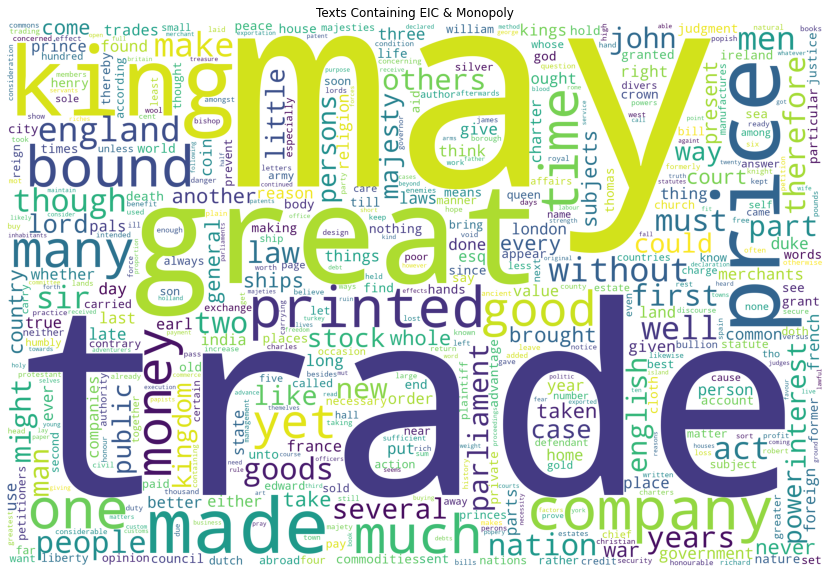

In [12]:
# Select dataframe (to run on different csv change the file in quotes)
df = pd.read_csv("Filtered_Texts/monopoly_all.csv")
make_word_cloud(df, "Texts Containing EIC & Monopoly")

After searching through the files that contained both EIC and monopoly, we realized that, in the time period, the EIC may not have been referred to as a "monopoly," so we will look into some other terms that may have been more used when talking about the EIC & its trade monopoly. For example, monopoly was *not* one of the most frequent terms in these files, so it may not have been the most common term used.

Let's look at some other interesting terms.

[('may', 35457), ('one', 34359), ('great', 33678), ('king', 31561), ('made', 27851), ('time', 24750), ('much', 20944), ('good', 19254), ('two', 19016), ('men', 18799), ('make', 18346), ('many', 18106), ('yet', 17449), ('trade', 17342), ('first', 17330), ('without', 16378), ('god', 15284), ('well', 14998), ('company', 14953), ('part', 14857), ('england', 14766), ('every', 13598), ('man', 13470), ('sir', 13369), ('lord', 13173), ('could', 13069), ('might', 12691), ('money', 12425), ('english', 12397), ('day', 12008), ('unto', 11914), ('must', 11896), ('majesty', 11385), ('though', 11328), ('place', 11324), ('several', 11175), ('way', 11017), ('take', 10998), ('people', 10945), ('three', 10924), ('years', 10660), ('therefore', 10552), ('like', 10445), ('court', 10314), ('come', 10194), ('parliament', 10186), ('law', 10125), ('ships', 10076), ('give', 10037), ('others', 9607), ('country', 9596), ('another', 9286), ('little', 9257), ('use', 9174), ('taken', 9151), ('year', 9070), ('never', 

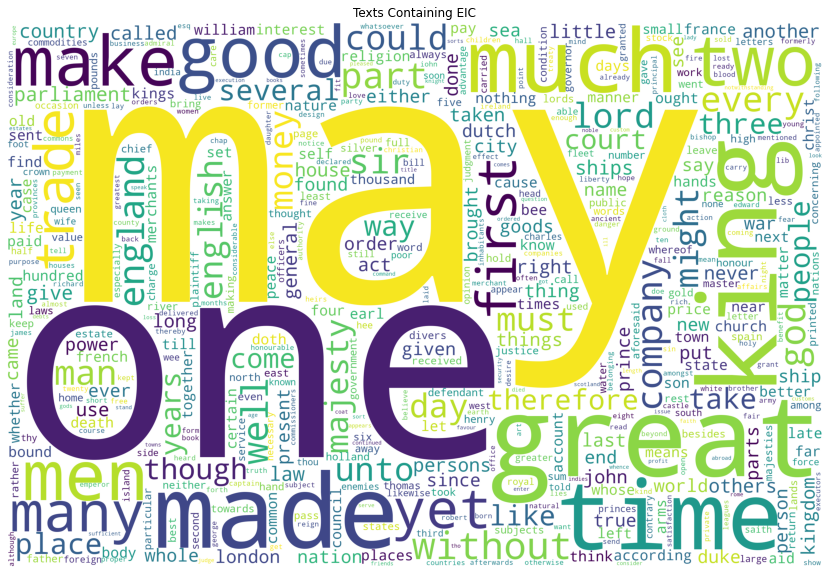

In [13]:
# EIC Word Cloud
df = pd.read_csv("Filtered_Texts/filtered_EIC.csv")
make_word_cloud(df, "Texts Containing EIC")

In [ ]:
# Price Word Cloud
df = pd.read_csv("Filtered_Texts/filtered_price.csv")
make_word_cloud(df, "Texts Containing Price")

In [ ]:
# Bound Word Cloud
df = pd.read_csv("Filtered_Texts/filtered_bound.csv")
make_word_cloud(df, "Texts Containing Bound")

In [ ]:
# Circulation Word Cloud
df = pd.read_csv("Filtered_Texts/filtered_circulation.csv")
make_word_cloud(df, "Texts Containing Circulation")